#Module 8: Linear Regression Assignment
Problem Statement:

You work in XYZ Company as a Python Data Scientist. The company officials
have collected some data on salaries based on year of experience and wish for
you to create a model from it.

Dataset: Salary data.csv

Tasks To Be Performed:
1. Load the dataset using pandas
2. Extract data from years experience column is a variable named X
3. Extract data from the salary column is a variable named Y
4. Divide the dataset into two parts for training and testing in 66% and 33%
proportion
5. Create and train Linear Regression Model on training set
6. Make predictions based on the testing set using the trained model
7. Check the performance by calculating the r2 score of the model

In [1]:
import pandas as pd
import numpy as np

In [2]:
#1. Load the dataset using pandas
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Assignment/Module 8/Salary data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
#2. Extract data from years experience column is a variable named X
# This line extracts the 'YearsExperience' column as a NumPy array and then reshapes it into a 2D array with one column.
# This is the format that scikit-learn's LinearRegression model expects for the input features.
# It's crucial for the model to understand that the input data has one feature (YearsExperience) and multiple samples.

X=df['YearsExperience'].values.reshape(-1, 1)
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [6]:
#3. Extract data from the salary column is a variable named Y
Y=df['Salary']
Y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [7]:
#4. Divide the dataset into two parts for training and testing in 66% and 33% proportion

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [8]:
# 5. Create and train Linear Regression Model on training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression()

In [9]:
#6. Make predictions based on the testing set using the trained model
Y_test_pred = regressor.predict(X_test)
print(Y_test_pred)

[115814.30756236  71511.92534771 102617.85328566  75282.34085534
  55487.65944028  60200.67882482 122412.53470072 107330.8726702
  63028.49045554  35692.97802523]


In [10]:
# Check the performance by calculating the r2 score of the model

from sklearn.metrics import r2_score
test_r2=r2_score(Y_test, Y_test_pred)
print(test_r2)

# What is r2_score and why it is important?
# The R-squared score is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
# In other words, it tells you how well the model fits the data.
# It ranges from 0 to 1, with 1 indicating a perfect fit.
# It is an important metric for evaluating the performance of a regression model.
# A higher R-squared value generally indicates a better fit, but it's not the only factor to consider.
# It's important to consider the context of the data and the potential for overfitting.

0.9553063138044949


In [11]:
# How to find overfitting and underfitting?
#overfitting
# To check for overfitting, you can compare the model's performance on the training set and the test set.
# If the model performs significantly better on the training set than on the test set, it might be overfitting.

# Underfitting
# Underfitting occurs when the model is too simple to capture the underlying patterns in the data.
# It performs poorly on both the training and test sets.
# To identify underfitting, check if the model's performance is poor on both the training and test sets.
# If the R-squared values are low for both sets, it indicates underfitting.


Y_train_pred = regressor.predict(X_train)
train_r2 = r2_score(Y_train, Y_train_pred)

print("Training R-squared:", train_r2)
print("Test R-squared:",test_r2)

# If the difference between the training and test R-squared values is large, it suggests overfitting.
# If both values are low, it suggests underfitting.
# To address underfitting, try using a more complex model, adding more features, or adjusting the model's parameters.


Training R-squared: 0.9549236946181227
Test R-squared: 0.9553063138044949


In [12]:
# Example of overfitting - In Train Model have very good data as compare to Test
train_r2 = 0.98
test_r2 = 0.65

print('Example of overfitting')
print("     Training R-squared:", train_r2)
print("     Test R-squared:",test_r2)

# Example of underfitting - Model don't have enough data to predict well
train_r2 = 0.5
test_r2 = 0.4

print('Example of underfitting')
print("   Training R-squared:", train_r2)
print("   Test R-squared:",test_r2)


Example of overfitting
     Training R-squared: 0.98
     Test R-squared: 0.65
Example of underfitting
   Training R-squared: 0.5
   Test R-squared: 0.4


In [13]:
# Why overfitting happend ?

# Overfitting happens when a model learns the training data too well, including the noise and random fluctuations in the data.
# This leads to a model that performs very well on the training data but poorly on new, unseen data.
# Here are some reasons why overfitting occurs:

# 1. Model Complexity:
#    - Using a complex model with many parameters (e.g., a deep neural network with many layers) can lead to overfitting.
#    - The model might learn to memorize the training data instead of generalizing to new data.

# 2. Insufficient Data:
#    - When the training dataset is small, the model may not be able to learn the underlying patterns effectively.
#    - It might overemphasize the limited examples and fail to generalize to new data.

# 3. Noise in Data:
#    - If the training data contains noise or irrelevant features, the model might learn these irrelevant patterns, leading to overfitting.

# 4. Lack of Regularization:
#    - Regularization techniques, such as L1 or L2 regularization, help prevent overfitting by adding a penalty to the model's complexity.
#    - Without regularization, the model can become too complex and overfit the training data.


In [14]:
# A Funcation to Test and how model predilected salary
def predict_salary(years_of_experience):
  """
  Predicts the salary based on years of experience using the trained model.

  Args:
    years_of_experience: The number of years of experience.

  Returns:
    The predicted salary.
  """
  # Reshape the input to match the model's expected input format
  years_of_experience = np.array(years_of_experience).reshape(-1, 1)

  # Make the prediction
  predicted_salary = regressor.predict(years_of_experience)

  return predicted_salary[0]


In [23]:
predict_salary(3)

53602.451686468834

In [24]:
# Funcation to show How model predicting salary min and max range for a specific year experience

def predict_salary_range(years_of_experience):
  """
  Predicts the salary range (min and max) based on years of experience using the trained model.

  Args:
    years_of_experience: The number of years of experience.

  Returns:
    A tuple containing the predicted minimum and maximum salary.
  """
  # Predict the salary using the existing model
  predicted_salary = predict_salary(years_of_experience)

  # Calculate the range (you can adjust the range calculation as needed)
  min_salary = predicted_salary * 0.9  # Example: 10% lower
  max_salary = predicted_salary * 1.1  # Example: 10% higher

  return min_salary, max_salary

# Example usage:
years_of_experience = 15
min_salary, max_salary = predict_salary_range(years_of_experience)
print(f"For {years_of_experience} years of experience, the predicted salary range is:")
print(f"Minimum salary: {min_salary:.2f}")
print(f"Maximum salary: {max_salary:.2f}")


For 15 years of experience, the predicted salary range is:
Minimum salary: 150043.43
Maximum salary: 183386.41


Mean Absolute Error (MAE): 4956.5232614449005
Mean Squared Error (MSE): 35301898.887134895
Root Mean Squared Error (RMSE): 5941.540110706558


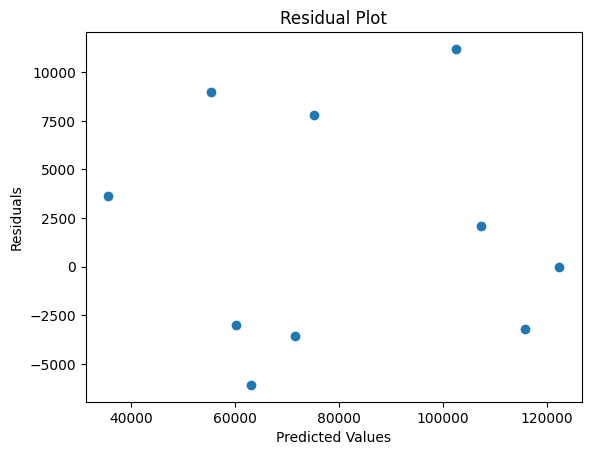

In [18]:
# Apart from R-squared, what other metrics should be checked to validate the performance of a linear regression model?

import numpy as np
# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Y_test_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_test_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Residual Plots
import matplotlib.pyplot as plt
residuals = Y_test - Y_test_pred
plt.scatter(Y_test_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Check for Homoscedasticity
# If the variance of the residuals is constant across all predicted values, then the model is homoscedastic.
# If the variance of the residuals is not constant, then the model is heteroscedastic.

# Check for Normality of Residuals
# The residuals should be normally distributed.
# You can use a histogram or a Q-Q plot to check for normality.

# Check for Outliers
# Outliers can have a significant impact on the model's performance.
# You can use a box plot or a scatter plot to identify outliers.


In [22]:
# Mean Absolute Error (MAE), Mean Squared Error, Root Mean Squared Error with sample data

import numpy as np
# Sample data
actual_values = [10, 12, 15, 18, 20]
predicted_values = [6, 11, 14, 17, 21]

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)
print("Mean Absolute Error (MAE):", mae)

# Explanation of MAE:
# MAE measures the average absolute difference between the actual and predicted values.
# It gives you an idea of how far off your predictions are on average.
# In this example, the MAE is 0.6, indicating that, on average, the predictions are 0.6 units away from the actual values.

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)
print("Mean Squared Error (MSE):", mse)

# Explanation of MSE:
# MSE calculates the average of the squared differences between the actual and predicted values.
# Squaring the differences gives more weight to larger errors.
# In this example, the MSE is 0.8, which represents the average squared difference between the actual and predicted values.

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print("Root Mean Squared Error (RMSE):", rmse)

# Explanation of RMSE:
# RMSE is the square root of the MSE. It provides a measure of the average error in the same units as the target variable.
# It's often preferred over MSE because it's easier to interpret as it's in the same units as the original data.
# In this example, the RMSE is approximately 0.9, indicating that the average error is about 0.9 units.


Mean Absolute Error (MAE): 1.6
Mean Squared Error (MSE): 4.0
Root Mean Squared Error (RMSE): 2.0
